In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,208,213,219,225,228,230,232,234,238,240
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1333,1341,1351,1360,1370,1379,1391,1402,1411,1418
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,80,80,86,86,88,88,90,92,93,94


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,5213,5362,5527,5637,5703,5814,6048,6330,6517,6730


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
...,...,...,...,...
2020-08-17,299126,4557,5814,111
2020-08-18,305966,6840,6048,234
2020-08-19,312659,6693,6330,282
2020-08-20,320884,8225,6517,187


<AxesSubplot:title={'center':'Total Cases'}>

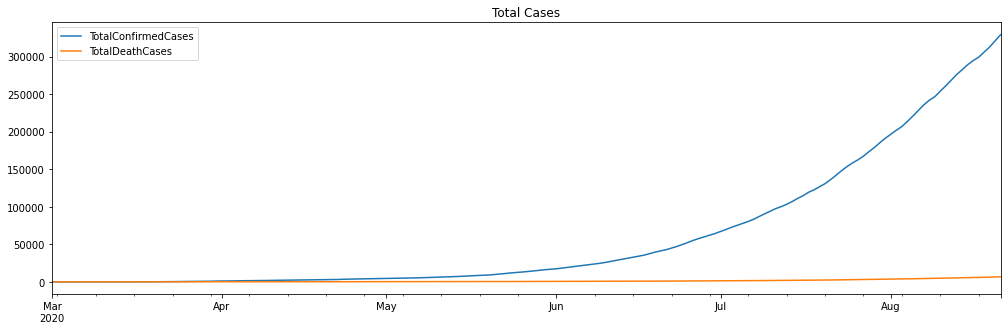

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

<AxesSubplot:title={'center':'New Cases'}>

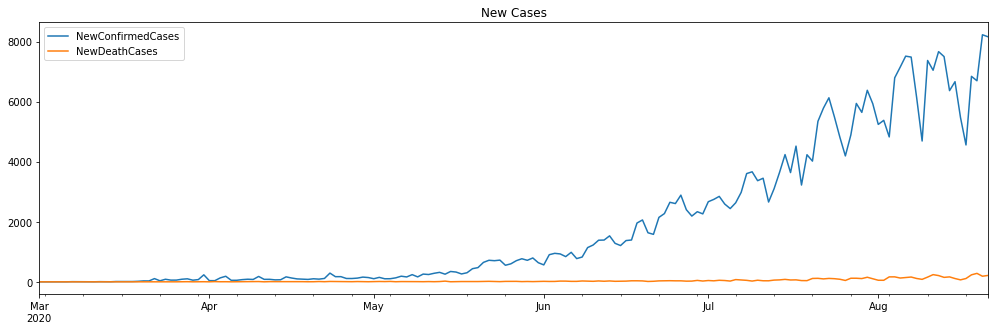

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
...,...,...
2020-08-17,299126,4557
2020-08-18,305966,6840
2020-08-19,312659,6693
2020-08-20,320884,8225


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]

In [29]:
#Testing only
#data_argentina = data_argentina.head(45)

In [30]:
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [31]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-08-17,299126,4557,5814,111,170
2020-08-18,305966,6840,6048,234,171
2020-08-19,312659,6693,6330,282,172
2020-08-20,320884,8225,6517,187,173
2020-08-21,329043,8159,6730,213,174


In [32]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [33]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [34]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def fourth_pow_model(x, a, b, c, d, e):
        return (a*x**4 + b*x**3 +c*x**2 + d*x + e)
    
#    def fiveth_pow_model(x, a, b, c, d, e, f):
#        return (a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f)
#    
#    def sixh_pow_model(x, a, b, c, d, e, f, g):
#        return (a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g)
#    
#    def exp_model(x, c, k):
#        return c * np.exp(k * x)

In [35]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [36]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.plot(x, model(x, *popt))
    plt.plot(x, y, 'ro')
    plt.show()

In [37]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-08-22 | 293016|
|2020-08-23 | 298030|
|2020-08-24 | 303084|
|2020-08-25 | 308178|
|2020-08-26 | 313313|
|2020-08-27 | 318488|
|2020-08-28 | 323703|
|2020-08-29 | 328958|
|2020-08-30 | 334254|
|2020-08-31 | 339591|
|2020-09-01 | 344967|
|2020-09-02 | 350384|
|2020-09-03 | 355841|
|2020-09-04 | 361339|
|2020-09-05 | 366877|
|2020-09-06 | 372455|
|2020-09-07 | 378073|
|2020-09-08 | 383732|
|2020-09-09 | 389431|
|2020-09-10 | 395171|
|2020-09-11 | 400950|
|2020-09-12 | 406770|
|2020-09-13 | 412631|
|2020-09-14 | 418531|
|2020-09-15 | 424473|
|2020-09-16 | 430454|
|2020-09-17 | 436476|
|2020-09-18 | 442538|
|2020-09-19 | 448640|
|2020-09-20 | 454782|
-------------------


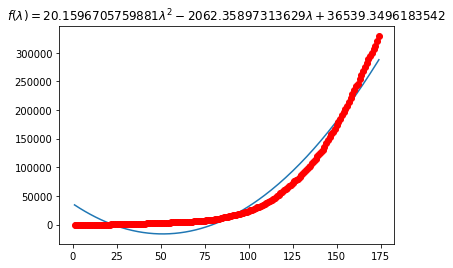

cubic_model
--- Predictions ---
|2020-08-22 | 338561|
|2020-08-23 | 346698|
|2020-08-24 | 354964|
|2020-08-25 | 363360|
|2020-08-26 | 371886|
|2020-08-27 | 380545|
|2020-08-28 | 389337|
|2020-08-29 | 398264|
|2020-08-30 | 407325|
|2020-08-31 | 416522|
|2020-09-01 | 425856|
|2020-09-02 | 435328|
|2020-09-03 | 444940|
|2020-09-04 | 454691|
|2020-09-05 | 464584|
|2020-09-06 | 474619|
|2020-09-07 | 484796|
|2020-09-08 | 495118|
|2020-09-09 | 505585|
|2020-09-10 | 516198|
|2020-09-11 | 526958|
|2020-09-12 | 537866|
|2020-09-13 | 548923|
|2020-09-14 | 560131|
|2020-09-15 | 571489|
|2020-09-16 | 583000|
|2020-09-17 | 594663|
|2020-09-18 | 606481|
|2020-09-19 | 618454|
|2020-09-20 | 630583|
-------------------


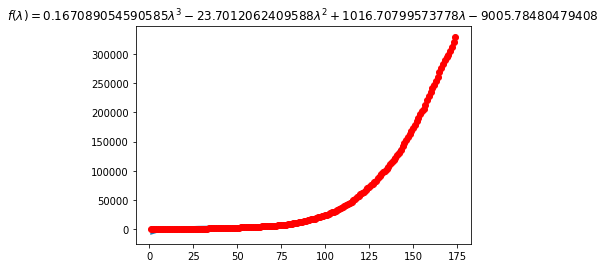

fourth_pow_model
--- Predictions ---
|2020-08-22 | 344981|
|2020-08-23 | 353851|
|2020-08-24 | 362888|
|2020-08-25 | 372094|
|2020-08-26 | 381470|
|2020-08-27 | 391019|
|2020-08-28 | 400742|
|2020-08-29 | 410642|
|2020-08-30 | 420721|
|2020-08-31 | 430980|
|2020-09-01 | 441422|
|2020-09-02 | 452049|
|2020-09-03 | 462863|
|2020-09-04 | 473866|
|2020-09-05 | 485060|
|2020-09-06 | 496448|
|2020-09-07 | 508031|
|2020-09-08 | 519812|
|2020-09-09 | 531792|
|2020-09-10 | 543975|
|2020-09-11 | 556361|
|2020-09-12 | 568954|
|2020-09-13 | 581755|
|2020-09-14 | 594767|
|2020-09-15 | 607992|
|2020-09-16 | 621432|
|2020-09-17 | 635090|
|2020-09-18 | 648967|
|2020-09-19 | 663066|
|2020-09-20 | 677390|
-------------------


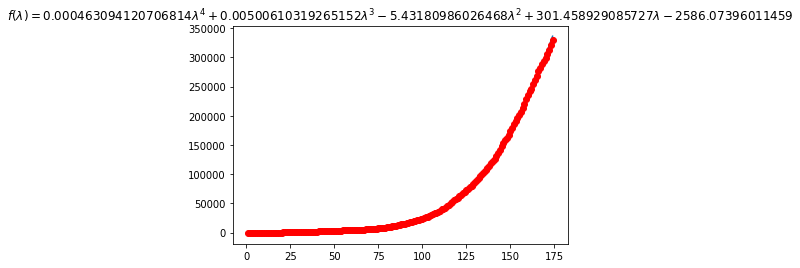

In [38]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.num_id, data_argentina.TotalConfirmedCases)

----------------------------

In [ ]:
data_argentina.head(60)

In [ ]:
df_prophet_aux = data_argentina.drop(['NewConfirmedCases','TotalDeathCases','NewDeathCases','num_id'], axis=1).reset_index()
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_prophet_aux['index']
df_prophet['y'] = df_prophet_aux['TotalConfirmedCases']
df_prophet.head(60)

In [ ]:
df_prophet.columns

In [ ]:
from fbprophet import Prophet
m = Prophet(growth='logistic') # the Prophet class (model)
m.fit(df_prophet) # fit the model using all data

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction Stock Price using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()